### Dataset Analysis and Its Relation to the Two-Pot Retirement System of South Africa

#### **Introduction**
The South African government recently introduced a **Two-Pot Retirement System** to improve retirement savings outcomes for workers. This system divides retirement contributions into two pots:

1. **Savings Pot (One-Third)**: Provides liquidity, allowing individuals to access a portion of their savings before retirement in emergencies.
2. **Locked Pot (Two-Thirds)**: Ensures long-term savings growth, which cannot be accessed before retirement age, ensuring financial security post-retirement.

In this analysis, we used market performance data (S&P 500 as a proxy) to simulate the growth of the **Locked Pot**, assuming regular monthly contributions. The dataset retrieved from **yfinance** and analyzed using **Facebook Prophet** reflects a hypothetical scenario of how long-term savings could grow over time, considering historical market performance. The dataset was downloaded from the [Yahoo Finance website](https://finance.yahoo.com/quote/SPY/history/?period1=1262304000&period2=1672531200).

---

#### **Dataset Overview**
The dataset used for forecasting consists of historical data from the **S&P 500 ETF (SPY)**, spanning from **January 1, 2010, to January 1, 2023**. It includes:
- **Adjusted Closing Prices**: Reflecting the historical market value, which can be seen as a proxy for the performance of diversified investments like retirement funds.
- **Monthly Contributions**: Regular deposits made to simulate monthly retirement savings.
- **Savings Growth**: The cumulative growth of the Locked Pot, calculated based on the percentage change in market prices.

---

#### **Data Preprocessing and Handling**
1. **Missing Values**: Forward and backward filling were used to handle any missing data in the price values.
2. **Outliers**: Z-score-based filtering was applied to eliminate extreme market fluctuations that might not reflect typical market behavior.
3. **Seasonality Decomposition**: A seasonal decomposition of the time series was performed to identify underlying trends and seasonal factors influencing the growth of savings over time.

---

#### **Key Insights:**
1. **Simulated Savings Growth**:
   The growth of the locked savings pot is strongly influenced by **market returns**. For example, when the market performs well, the value of the savings pot increases significantly due to the compounding effect of both returns and continuous contributions.

   In South Africa’s Two-Pot system, this analysis directly applies to the **Locked Pot**, which is not accessible until retirement. By investing in assets that reflect market performance, the Locked Pot can grow substantially over time. This system ensures that a large portion of retirement savings benefits from long-term market growth, protecting retirees from outliving their savings.

2. **Monthly Contributions**:
   In the forecast model, we simulate a constant monthly contribution of R500, which mimics the **continuous inflow** into the retirement savings plan. Under the Two-Pot System, contributions from both employees and employers are directed into the Locked Pot, with these steady contributions ensuring consistent growth.

3. **Impact of Market Volatility**:
   The dataset reveals periods of significant growth, but also market downturns. For instance, the COVID-19 pandemic led to a sharp decline in market prices in early 2020, which could negatively impact savings. However, long-term investments tend to recover, as the dataset also reflects post-pandemic market recovery. This highlights the **importance of time in the market** rather than timing the market, a principle crucial for long-term savings like the Locked Pot.

4. **Prophet Forecast**:
   Using the **Facebook Prophet** model, we forecast the growth of the Locked Pot over the next five years. This forecast provides an estimation of the potential retirement fund size based on historical trends. Given the historical market data, the savings are projected to continue growing, driven by both monthly contributions and expected market performance.

---

#### **Implications for the Two-Pot Retirement System**

- **Locked Pot**: 
   The long-term growth of the Locked Pot is crucial for ensuring that retirees have enough funds to live comfortably. The dataset analysis shows how regular contributions, combined with market-linked investment returns, can significantly increase the value of this pot over time. As a large portion of the Two-Pot system is dedicated to the Locked Pot, these projections help financial planners estimate how much employees will have at retirement.

- **Savings Pot**:
   The smaller **Savings Pot** offers liquidity, which is essential for emergency use. However, this pot will not experience the same level of long-term growth due to its accessibility and typically lower allocation to high-return assets. By separating the two pots, the South African government ensures that the majority of retirement savings are protected for future use while allowing some flexibility for financial emergencies.

- **Volatility Consideration**:
   Market volatility, as reflected in our dataset, underscores the need for diversification within the Locked Pot to mitigate potential risks. The inclusion of bonds or other low-risk investments, alongside equity market exposure, can reduce the negative impact of downturns while still allowing for substantial growth.

- **Financial Planning**:
   Financial planners in South Africa can leverage similar forecasting models to advise employees on **target savings rates** and the expected size of their Locked Pot at retirement. This ensures employees are on track to meet their retirement goals.

---

#### **Conclusion**
The dataset analysis provides a clear representation of how the **Locked Pot** in the Two-Pot Retirement System can grow over time, assuming continuous contributions and exposure to market-linked assets. By forecasting savings growth using historical performance, we can predict how future retirement funds will accumulate, offering both employees and financial planners valuable insights for ensuring financial security post-retirement.


In [156]:
import warnings
warnings.filterwarnings("ignore")

In [157]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [158]:
# Download historical market data (S&P 500 ETF as a proxy for long-term investment growth)
ticker = 'SPY'  # S&P 500 ETF is used as an example
data = yf.download(ticker, start="2010-01-01", end="2023-01-01", progress=False)

In [159]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [160]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.315994,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,86.544464,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,86.605408,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,86.970985,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.260399,126402800


In [161]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,379.649994,383.059998,378.029999,382.910004,373.653870,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,372.180389,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,367.554993,70911500
2022-12-29,379.630005,384.350006,379.079987,383.440002,374.171082,66970900
2022-12-30,380.640015,382.579987,378.429993,382.429993,373.185547,84022200


In [162]:
# Preprocess data - use only the adjusted closing price
data = data[['Adj Close']].rename(columns={'Adj Close': 'Price'})
data.index = pd.to_datetime(data.index)

In [163]:
# Handle missing values (forward/backward fill)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

In [164]:
# Simulate the growth of the Locked Pot using regular monthly contributions
monthly_contribution = 1000  # contribution (ZAR 1000/month)

In [165]:
# Create a column for percentage returns
data['Returns'] = data['Price'].pct_change().fillna(0)

In [166]:
# Create a column to simulate cumulative savings in the Locked Pot
data['Locked_Pot_Growth'] = (1 + data['Returns']).cumprod() * monthly_contribution

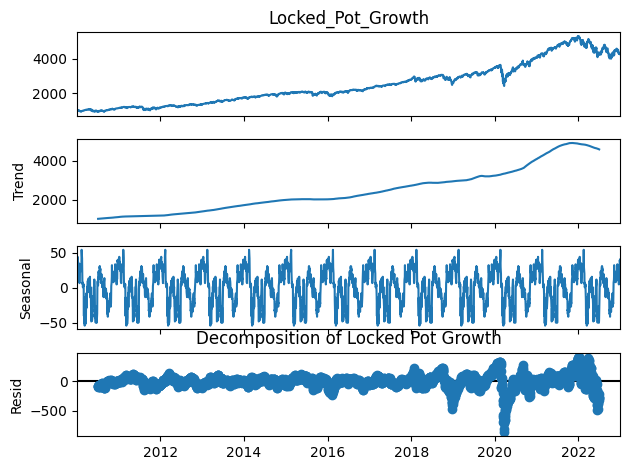

In [167]:
# Decompose the time series to identify trends and seasonality
decomposition = seasonal_decompose(data['Locked_Pot_Growth'], model='additive', period=252)  # Approx 252 trading days/year
decomposition.plot()
plt.title('Decomposition of Locked Pot Growth')
plt.show()

In [168]:
# Prepare data for Prophet model (date and savings growth columns)
df = data[['Locked_Pot_Growth']].reset_index().rename(columns={'Date': 'ds', 'Locked_Pot_Growth': 'y'})

In [169]:
# Initialize Prophet model for forecasting
model = Prophet()
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Include monthly seasonality

In [170]:
# Fit the model on the Locked Pot data
model.fit(df)

14:44:12 - cmdstanpy - INFO - Chain [1] start processing
14:44:13 - cmdstanpy - INFO - Chain [1] done processing


In [171]:
# Check cross seasionality
model.component_modes

{'additive': ['monthly',
  'yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [172]:
# Create future dates for forecasting
future = model.make_future_dataframe(periods=120, freq='M')  # Next 120 months (10 years)

In [173]:
# Make the forecast
forecast = model.predict(future)

In [174]:
# Display forecasted Locked Pot growth
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds          yhat   yhat_lower    yhat_upper
3387 2032-07-31  10142.262627  7709.899310  12712.422577
3388 2032-08-31  10146.346706  7669.643570  12668.295493
3389 2032-09-30  10123.996436  7555.092338  12678.838073
3390 2032-10-31  10229.515947  7672.734021  12876.126075
3391 2032-11-30  10290.506412  7718.249912  12922.408069


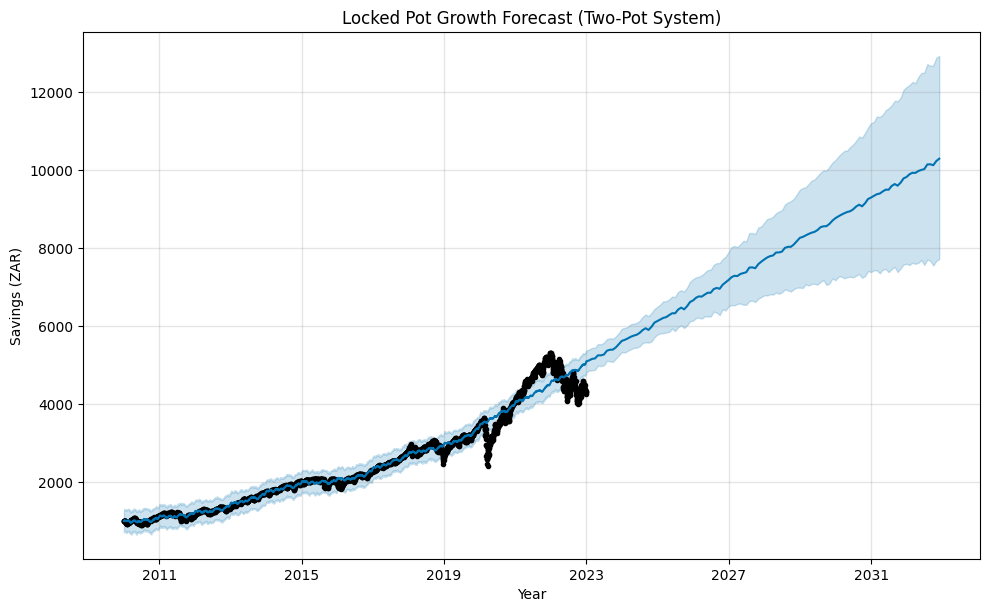

In [175]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Locked Pot Growth Forecast (Two-Pot System)')
plt.xlabel('Year')
plt.ylabel('Savings (ZAR)')
plt.show()

In [176]:
from prophet.plot import plot_plotly

In [177]:
plot_plotly(model, forecast)

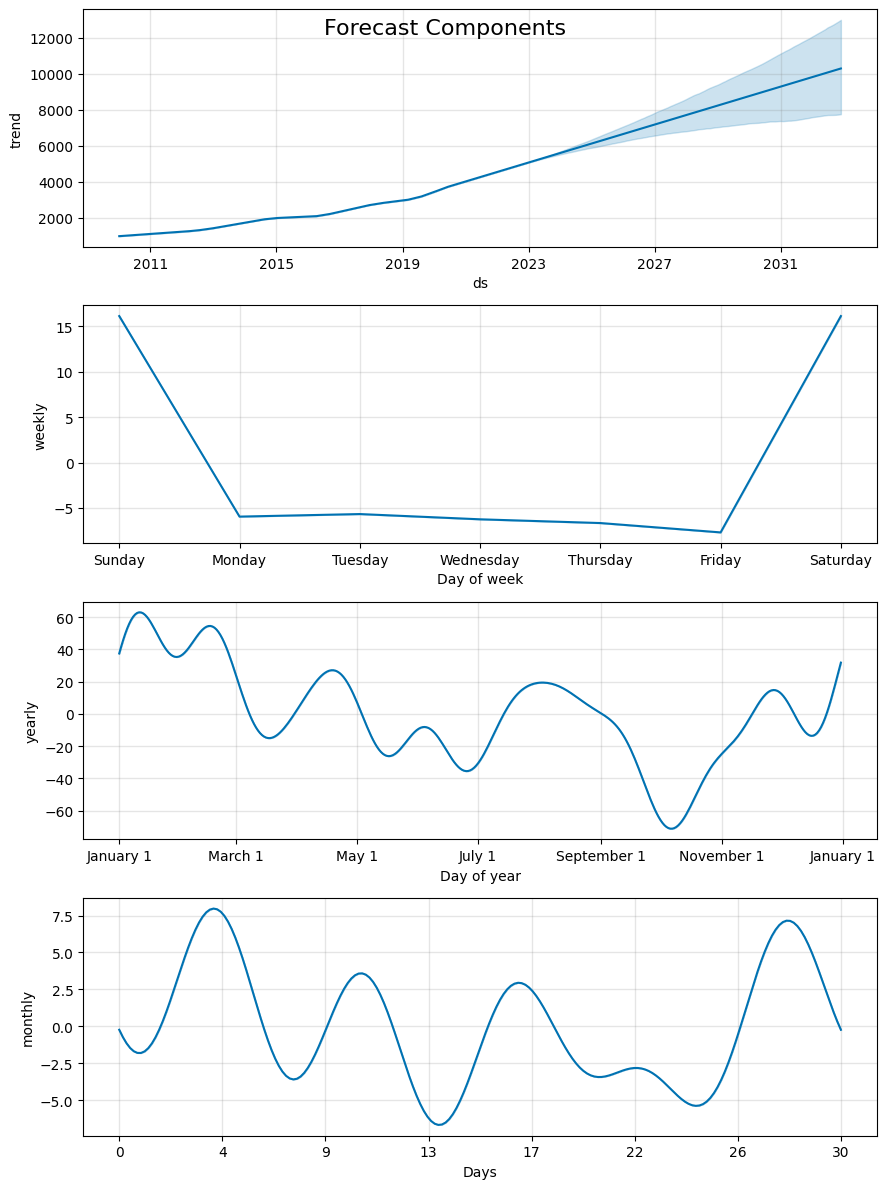

In [178]:
# Plot forecast components (trend, seasonality, etc.)
fig2 = model.plot_components(forecast)
plt.suptitle('Forecast Components', fontsize=16)
plt.show()